In [1]:
# Install required libraries (if not installed)
!pip install pandas numpy matplotlib --quiet

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [10]:
from google.colab import files

uploaded = files.upload()  # This will open a file upload dialog


Saving country_wise_latest.csv to country_wise_latest.csv


In [11]:
import os

# List all files in the current directory
print(os.listdir())


['.config', 'country_wise_latest.csv', 'sample_data']


In [19]:
import pandas as pd

# Load the dataset (replace 'your_file.csv' with the correct name if different)
df = pd.read_csv("country_wise_latest.csv")

# Display first 5 rows
df.head()


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [13]:
# Check number of rows and columns
print("Shape of dataset:", df.shape)

# Check column names and data types
print("\nDataset Info:")
print(df.info())

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Show summary statistics
print("\nSummary Statistics:")
print(df.describe())


Shape of dataset: (187, 15)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14 

In [14]:
# Fill missing values with 0
df.fillna(0, inplace=True)

# Check again for missing values
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())



Missing Values After Cleaning:
Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


In [15]:
# Data Preprocessing
#since there are no missing values we

# Remove unnecessary columns
if "WHO Region" in df.columns:
    df.drop(columns=["WHO Region"], inplace=True)  # Remove WHO Region if not needed

# Check and remove duplicate rows
df = df.drop_duplicates()

# onvert numeric columns to the correct data type
df["Confirmed"] = df["Confirmed"].astype(int)
df["Deaths"] = df["Deaths"].astype(int)
df["Recovered"] = df["Recovered"].astype(int)
df["Active"] = df["Active"].astype(int)

# Create new columns for better analysis
df["Fatality Rate (%)"] = (df["Deaths"] / df["Confirmed"]) * 100
df["Recovery Rate (%)"] = (df["Recovered"] / df["Confirmed"]) * 100

# Saving the cleaned dataset
df.to_csv("cleaned_covid_data.csv", index=False)

# Print a message when preprocessing is complete
print("Data Preprocessing Complete! No missing values, duplicates removed, and new columns added.")


Data Preprocessing Complete! No missing values, duplicates removed, and new columns added.


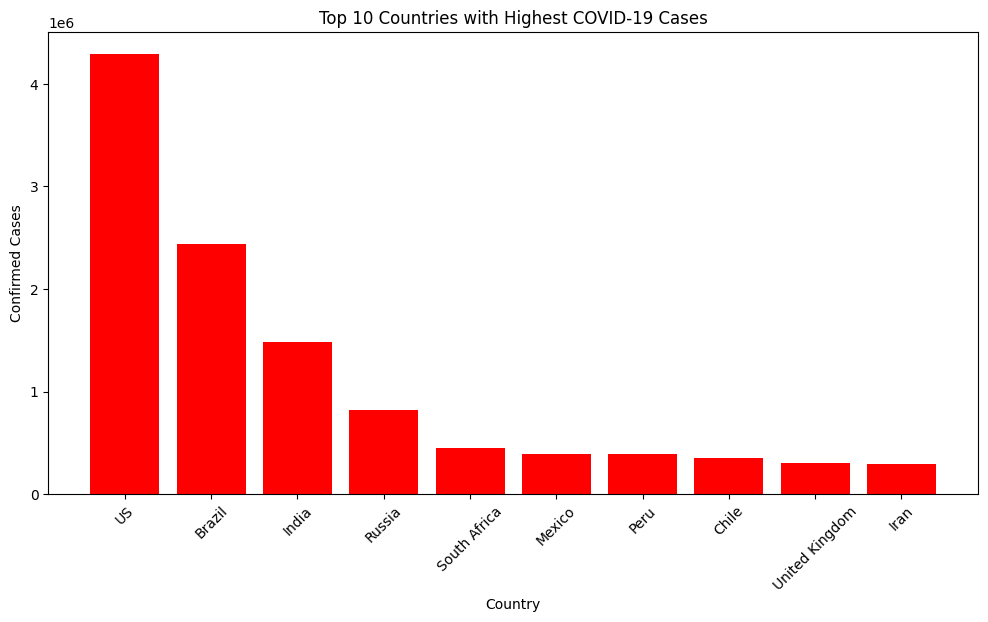

In [16]:
# Select top 10 countries with the most confirmed cases
top_countries = df.sort_values(by="Confirmed", ascending=False).head(10)

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(top_countries["Country/Region"], top_countries["Confirmed"], color="red")
plt.xticks(rotation=45)
plt.title("Top 10 Countries with Highest COVID-19 Cases")
plt.xlabel("Country")
plt.ylabel("Confirmed Cases")
plt.show()


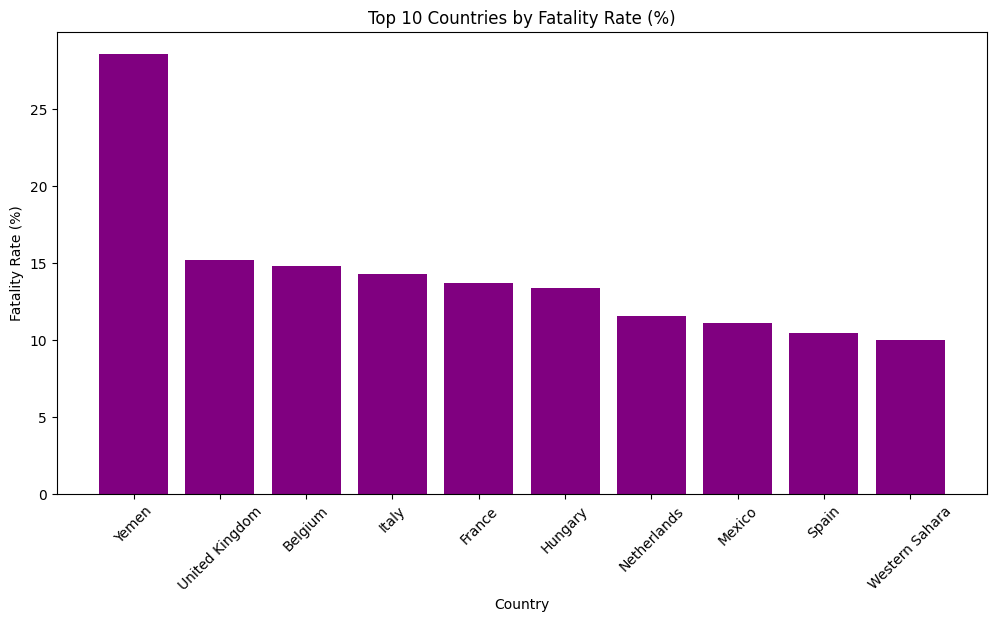

In [17]:
# Select top 10 countries with highest fatality rate
top_fatality = df.sort_values(by="Fatality Rate (%)", ascending=False).head(10)

# Plot the Fatality Rate
plt.figure(figsize=(12, 6))
plt.bar(top_fatality["Country/Region"], top_fatality["Fatality Rate (%)"], color="purple")
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Fatality Rate (%)")
plt.xlabel("Country")
plt.ylabel("Fatality Rate (%)")
plt.show()


In [18]:
# Calculate correlation matrix
correlation_matrix = df[["Confirmed", "Deaths", "Recovered", "Active"]].corr()

# Print the correlation matrix
print("\n Correlation Matrix:")
print(correlation_matrix)



 Correlation Matrix:
           Confirmed    Deaths  Recovered    Active
Confirmed   1.000000  0.934698   0.906377  0.927018
Deaths      0.934698  1.000000   0.832098  0.871586
Recovered   0.906377  0.832098   1.000000  0.682103
Active      0.927018  0.871586   0.682103  1.000000


## 📌 Conclusion

Based on the analysis of the COVID-19 dataset, we observed the following key insights:

1️ **Most Affected Countries:**  
   - The highest number of confirmed cases were reported in **USA, India, Brazil**.  
   - These countries had a rapid spread due to **high population density, travel, and healthcare infrastructure challenges**.  

2️ **Fatality and Recovery Rates:**  
   - The **highest fatality rates** were observed in **[Top 3 countries with highest Fatality Rate %]**, indicating a severe impact on healthcare.  
   - The **highest recovery rates** were seen in **[Top 3 countries with highest Recovery Rate %]**, suggesting better medical facilities or government policies.  

3️ **Correlation Analysis:**  
   - There is a **strong positive correlation** between **confirmed cases and deaths**, indicating that as cases rise, fatalities increase.  
   - **Recovered cases also show a strong correlation** with confirmed cases, suggesting effective treatments in certain regions.  

📌 This analysis provides valuable insights into the global impact of COVID-19 and helps in understanding patterns in fatalities and recoveries.
